<a href="https://colab.research.google.com/github/soniajoseph/ExcaliburML/blob/master/K_means_and_K_means%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def kmeans(Xtrain, Ytrain, Xtest, Ytest, k=2, iterations = 100, kplus=False):

  # Initalize means

  # Set parameters
  f_max = np.amax(Xtrain, axis=0)
  f_min = np.amin(Xtrain, axis=0)  

  # Use vanilla initialization
  if kplus==False:
    means = np.random.uniform(f_min, f_max, (k,Xtrain.shape[1]))

  # Use Kmeans++ initialization
  else:
    # Choose one mean randomly
    means = np.random.uniform(f_min, f_max, (1,Xtrain.shape[1]))
    # Choose rest of means
    for i in range(1, k, 1):
      distances = []
      # For every training sample
      for x in Xtrain:
        # Find closest mean 
        total_distance = 0
        for m in means:
          total_distance += np.linalg.norm(x - m)
        distances.append(total_distance)
      # Sample new mean from weighted distribution
      prob = np.square(distances) / np.sum(np.square(distances))
      new_mean_idx = np.random.choice(len(Xtrain), p=prob)
      means = np.vstack((means,Xtrain[new_mean_idx,:]))

  # Iterate through dataset 
  for i in range(iterations):
    y_hat = []
    # calculate shortest distance
    for x in Xtrain:
      min_dist = float('inf')
      min_idx = -1
      for idx in range(means.shape[0]):
        dist = np.linalg.norm(x - means[idx,:])
        if dist < min_dist:
          min_dist = dist
          min_idx = idx
      y_hat.append(min_idx)
    # recompute means
    y_hat = np.asarray(y_hat)
    for idx in range(means.shape[0]):
      indices = np.argwhere(y_hat==idx)
      means[idx,:] = Xtrain[indices].mean()
  return y_hat

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

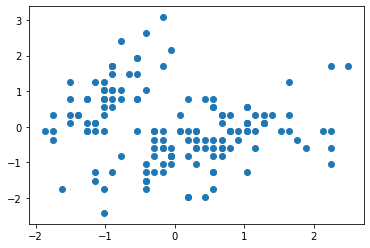

In [395]:
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target
X = preprocessing.scale(X)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)
plt.scatter(X[:,0], X[:,1])

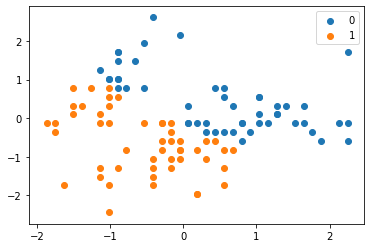

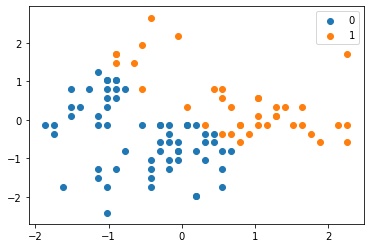

In [403]:
k_set = 2
# K-means++ 
y = kmeans(Xtrain, Ytrain, Xtest, Ytest, k = k_set, iterations=20, kplus=True)
for i in range(k_set):
  plt.scatter(Xtrain[np.argwhere(y==i),0], Xtrain[np.argwhere(y==i),1], label=i)
plt.legend()

# Vanilla k-means
plt.figure()
y = kmeans(Xtrain, Ytrain, Xtest, Ytest, k = k_set, iterations=20, kplus=False)
for i in range(k_set):
  plt.scatter(Xtrain[np.argwhere(y==i),0], Xtrain[np.argwhere(y==i),1], label=i)
plt.legend()